In [4]:
import sys
sys.path.insert(1, '/home/maria/Documents/EnsemblePursuit')
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, gaussian_filter1d
import seaborn as sns

In [2]:
data_path='/home/maria/Documents/data_for_suite2p/TX39/'
dt=1
spks= np.load(data_path+'spks.npy')
print('Shape of the data matrix, neurons by timepoints:',spks.shape)
iframe = np.load(data_path+'iframe.npy') # iframe[n] is the microscope frame for the image frame n
ivalid = iframe+dt<spks.shape[-1] # remove timepoints outside the valid time range
iframe = iframe[ivalid]
S = spks[:, iframe+dt]
U=np.load('U.npy')
input_patterns=S[np.nonzero(U[:,13])[0],:]
input_patterns=zscore(input_patterns,axis=1)
del spks
del S

Shape of the data matrix, neurons by timepoints: (18795, 30766)


In [3]:
weights=np.load('/media/maria/DATA1/Documents/Neocortex/SOC/soc.txt.npy')

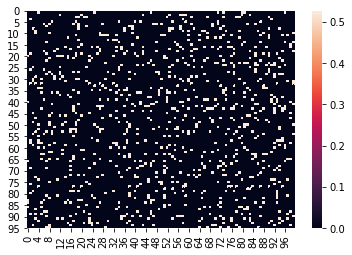

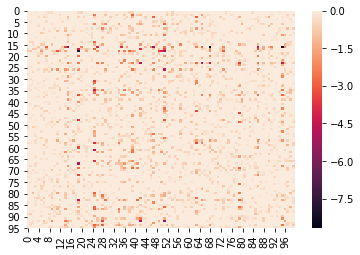

In [26]:
#Inhibitory sub-population
num_neurons=200
first_quadrant = np.arange(num_neurons/2)
second_quadrant = first_quadrant + num_neurons/2
first_quadrant=first_quadrant.astype('int')
second_quadrant=second_quadrant.astype('int')
W_IE = weights[np.ix_(second_quadrant,first_quadrant)]
W_II = weights[np.ix_(second_quadrant,second_quadrant)]
sns.heatmap(W_IE)
plt.show()
sns.heatmap(W_II)

(656, 30560)
(100, 1500)
[[ 1.69052570e+00  1.75617864e+00  1.81227772e+00 ... -6.45512915e+06
  -6.51968049e+06 -6.58487735e+06]
 [-4.65937371e-01 -4.03579454e-01 -4.16570497e-01 ...  5.61088362e+06
   5.66699240e+06  5.72366228e+06]
 [ 3.28201637e-02  1.08142344e-01  1.81632924e-01 ...  9.37295518e+05
   9.46668423e+05  9.56135057e+05]
 ...
 [ 8.69039329e-01  9.50702868e-01  9.95282297e-01 ...  2.19680080e+07
   2.21876881e+07  2.24095649e+07]
 [-3.42117023e-01 -1.69240157e-01 -8.67974630e-02 ...  1.18786453e+07
   1.19974317e+07  1.21174059e+07]
 [-4.71926652e-01 -3.39736072e-01 -2.94734430e-01 ...  1.46295530e+07
   1.47758485e+07  1.49236069e+07]]
5.615289e-10


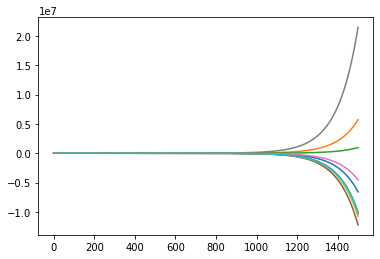

In [64]:
np.random.seed(7)
def gain_function(x):
    x[x<0]= 5*np.tanh(x[x<0]/5)
    '''
    if x<0:
        return 5*np.tanh(x/5)
    else:
        return (100-5)*np.tanh(x/(100-5))
    '''
    x[x>=0]=(100-5)*np.tanh(x[x>=0]/(100-5))
    return x
inh_weights=np.hstack((W_IE,W_II))
#inh_weights=np.random.normal(0,1,(100,200))
activity_pattern=[np.random.normal(0,1,(100,))]
print(input_patterns.shape)
h=0.01
for t in range(1,1500):
    #print(t)
    x=activity_pattern[-1].reshape(100,)
    #print('z',x.shape)
    inp=np.concatenate((input_patterns[:100,t].reshape(100,),x),axis=0)
    dxdt=(-x-gain_function(inh_weights@inp))
    #print('dxdt',dxdt.shape)
    activity_pattern.append(activity_pattern[-1]-h*dxdt.reshape(100,))
    #print(activity_pattern)
activity_patterns=np.array(activity_pattern).T
print(activity_patterns.shape)
print(activity_patterns)
plt.plot(activity_patterns[:10,:].T)
print(np.mean(input_patterns))